<a href="https://colab.research.google.com/github/dattali18/IR_Assignments/blob/main/Assignment.02/notebooks/IR_02_Classification_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IR Assignment 2

## Classification

### **Objective**:
  - Build classifiers to predict the journal group.

### **Algorithms**:
  - **Artificial Neural Network (ANN)** (two architectures provided):
      - ANN Architecture 1: RELU activation layers.
      - ANN Architecture 2: GELU activation layers.
  - **Other Classifiers**: Naive Bayes (NB), Support Vector Machine (SVM), Logistic Regression (LoR), Random Forest (RF).

### **Tasks**:
  - Perform 10-fold cross-validation for all classifiers (except ANN).
  - Identify and rank the top 20 most important features for NB, RF, SVM, LoR.
  - Write explanations for feature importance in a README document and include the ranked lists in an Excel file.
  - Check what is the top 20 most important features for the ANN models.

### **ANN Specifics**:
  - Split data: Train (80%, with 10% validation from the train set) and Test (20%).
  - Use the given ANN architectures with specific configurations:
      - Maximum 15 epochs.
      - Batch size: 32.
      - Early stopping after 3 validation iterations without improvement.
      - Save the best model (ModelCheckpoint).

In [67]:
import warnings

warnings.filterwarnings("ignore")

In [68]:
doc2vec_link = "https://github.com/dattali18/IR_Assignments/blob/main/Assignment.02/data/doc2vec/doc2vec_vectors.csv?raw=true"

In [69]:
import pandas as pd

df_original = pd.read_csv(doc2vec_link)

df = pd.DataFrame()
df['Sheet'] = df_original['Sheet']

df['vector'] = df_original.iloc[:, 2:].values.tolist()


cluster_map = {'A-J': 0, 'BBC': 1, 'J-P': 2, 'NY-T': 3}
df['cluster'] = df['Sheet'].map(cluster_map)

df.head()

,Sheet,vector,cluster
0,A-J,"[-0.323680430650711, 0.5360641479492188, -0.05...",0
1,A-J,"[-0.1454735696315765, 0.5806173086166382, 0.05...",0
2,A-J,"[-0.1526012271642685, 0.4343386590480804, 0.47...",0
3,A-J,"[-0.6122026443481445, 0.287306398153305, 0.622...",0
4,A-J,"[-0.4187790155410766, 0.2314711958169937, 0.63...",0


In [70]:
# standerdize the data mean=0 std=1
import numpy as np

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# apply to each line of the df

df['std_vector'] = df['vector'].apply(lambda x: scaler.fit_transform(np.array(x).reshape(-1, 1)).flatten())
df['std_vector'].head()

,std_vector
0,"[-0.8898444679243975, 1.5867284496581213, -0.1..."
1,"[-0.45412855563660753, 1.5962898513829487, 0.1..."
2,"[-0.4265908635369363, 1.2374741265373976, 1.35..."
3,"[-1.7774307627408343, 0.8400083803083657, 1.81..."
4,"[-1.315865498091188, 0.6433641277978894, 1.857..."


In [71]:
# visualize the real cluster using t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

# transofrm the df['vector'] to dataframe with freatuer 0 - 99 for
df_copy = df['std_vector'].apply(pd.Series)

df_tsne = tsne.fit_transform(df_copy)

df_tsne = pd.DataFrame(df_tsne, columns=['x', 'y'])

df_tsne['cluster'] = df['cluster']

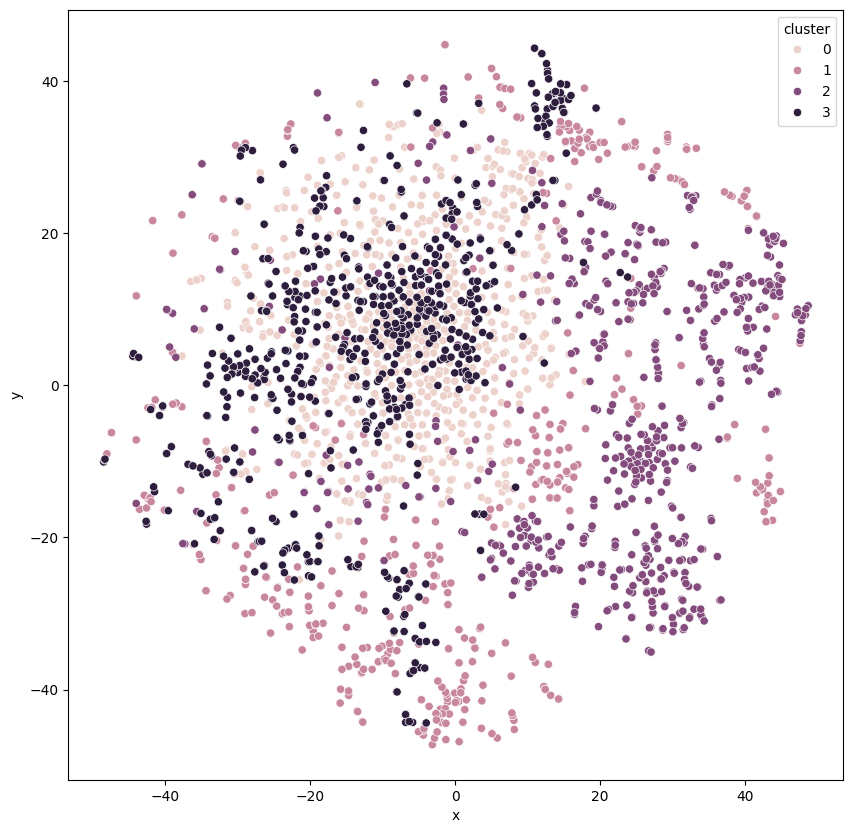

In [72]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_tsne, x="x", y="y", hue="cluster")

plt.show()

# save the data
df.to_csv("doc2vec_tsne.csv", index=False)

In [73]:
# import all the the needed libraries NaiveBayes, SVM, LoR, RF
data = df['std_vector'].tolist()

In [74]:
data = np.array(data)

In [75]:
type(data)

numpy.ndarray

In [76]:
data.shape

(2346, 300)

## Naive Bayes Classifier

In [77]:
# naive bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = data
y = df['cluster'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train type:", type(X_train))
print("y_train type:", type(y_train))

X_train shape: (1665, 300)
y_train shape: (1665,)
X_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>


In [78]:
# use Naive Bayes with 10-fold cross validation
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

scores = cross_val_score(gnb, X_train, y_train, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.04)


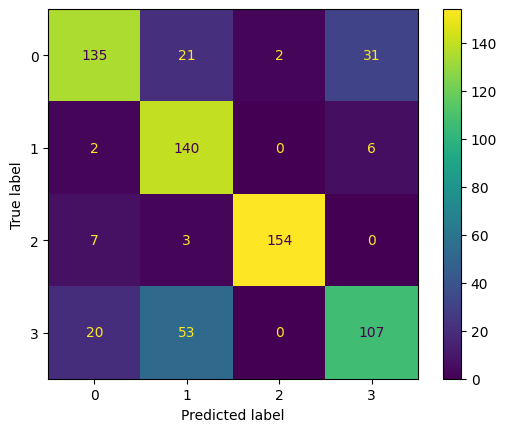

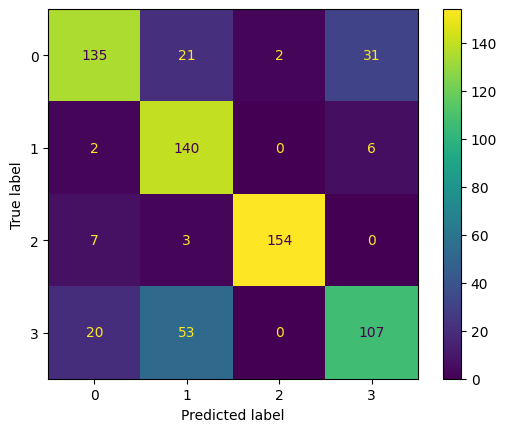

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay

gnb.fit(X_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)

disp.plot()

plt.show()

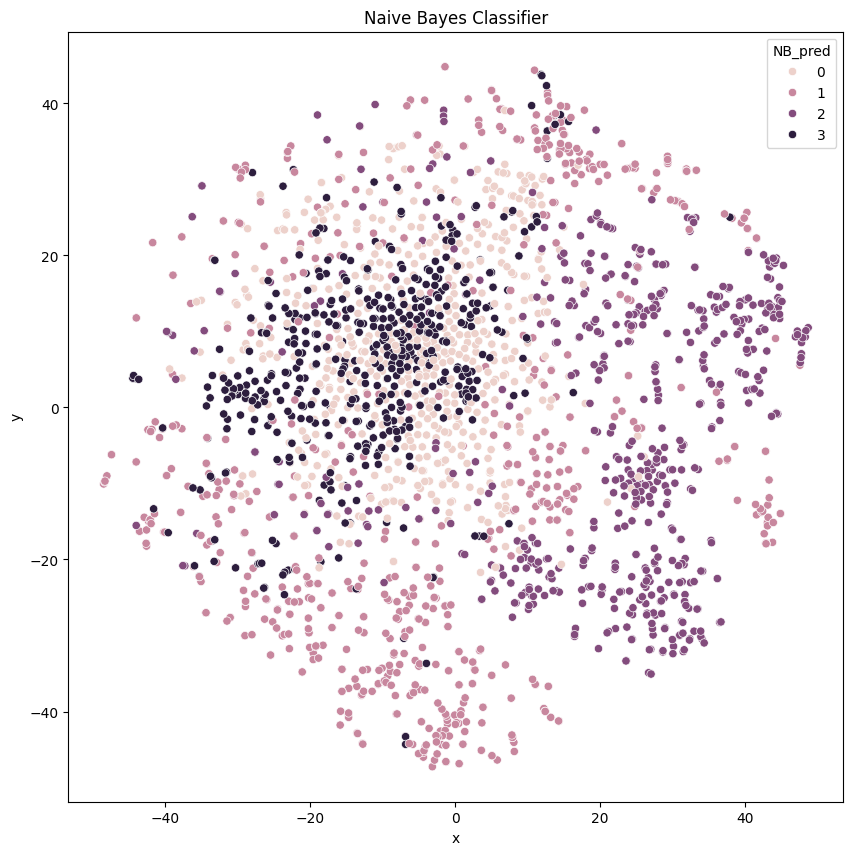

In [80]:
# get the calssification report for all X from the model and color the results using the tsne plot
df_tsne['NB_pred'] = gnb.predict(X)


plt.figure(figsize=(10, 10))

#  add title
plt.title("Naive Bayes Classifier")

sns.scatterplot(data=df_tsne, x="x", y="y", hue="NB_pred")

plt.show()

## SVM - Support Vector Machine

In [81]:
# use SVM with 10-fold cross validation
from sklearn.svm import SVC

svc = SVC()

scores = cross_val_score(svc, X_train, y_train, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.04)


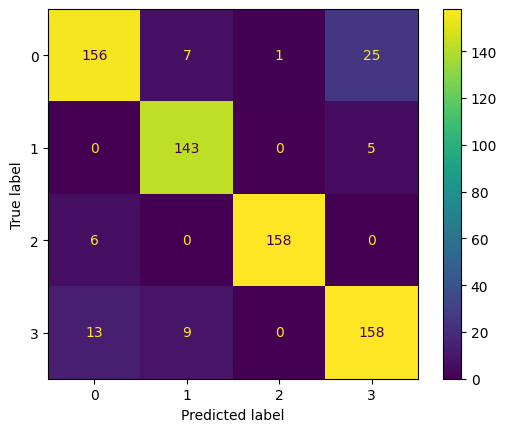

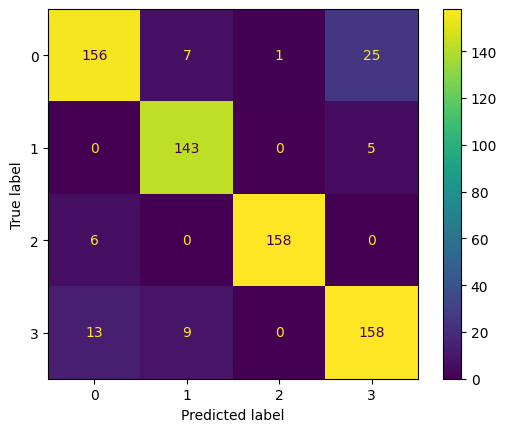

In [82]:
# same as NB

svc.fit(X_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

disp.plot()

plt.show()

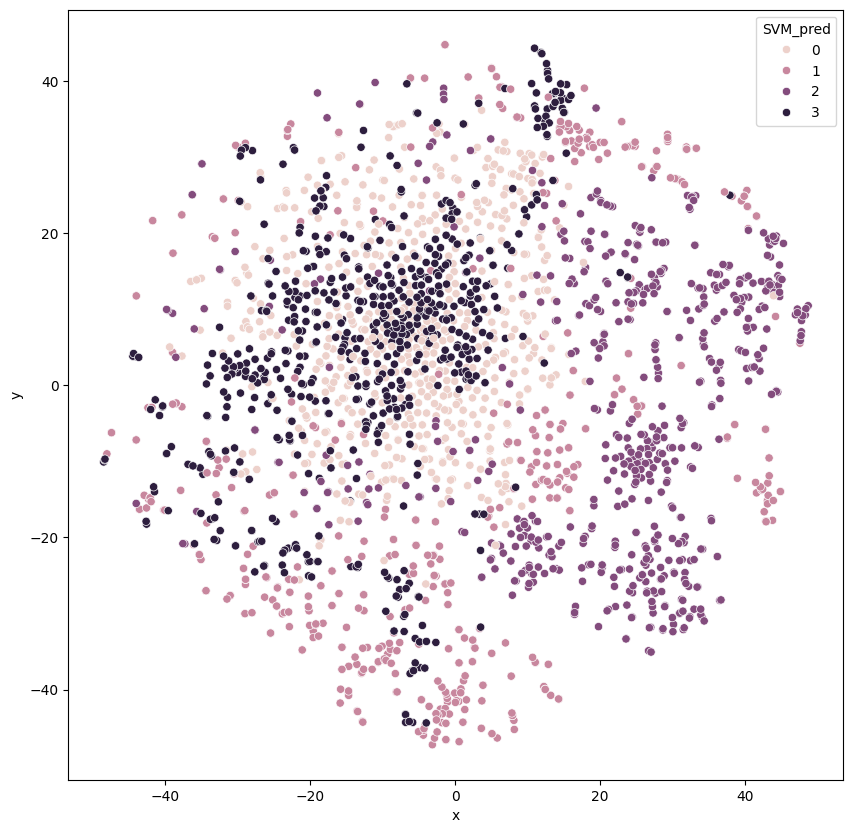

In [83]:
# get the calssification report for all X from the model and color the results using the tsne plot
df_tsne["SVM_pred"] = svc.predict(X)


plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_tsne, x="x", y="y", hue="SVM_pred")

plt.show()

## Logistic Regression

In [84]:
# use Logistic Regression with 10-fold cross validation

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

scores = cross_val_score(lr, X_train, y_train, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.08)


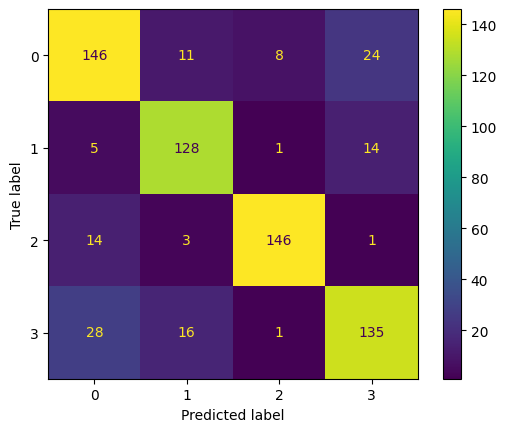

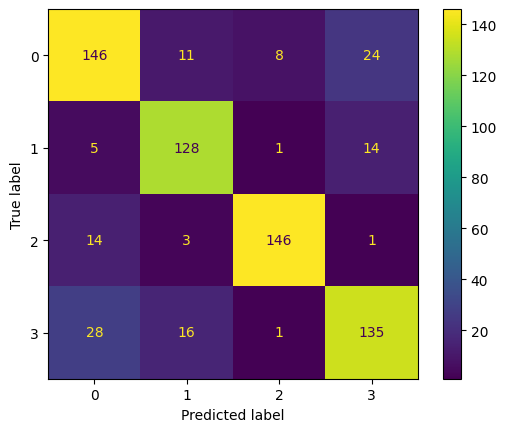

In [85]:
# same

# visualize the results of the classification for all the X

lr.fit(X_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

disp.plot()

plt.show()

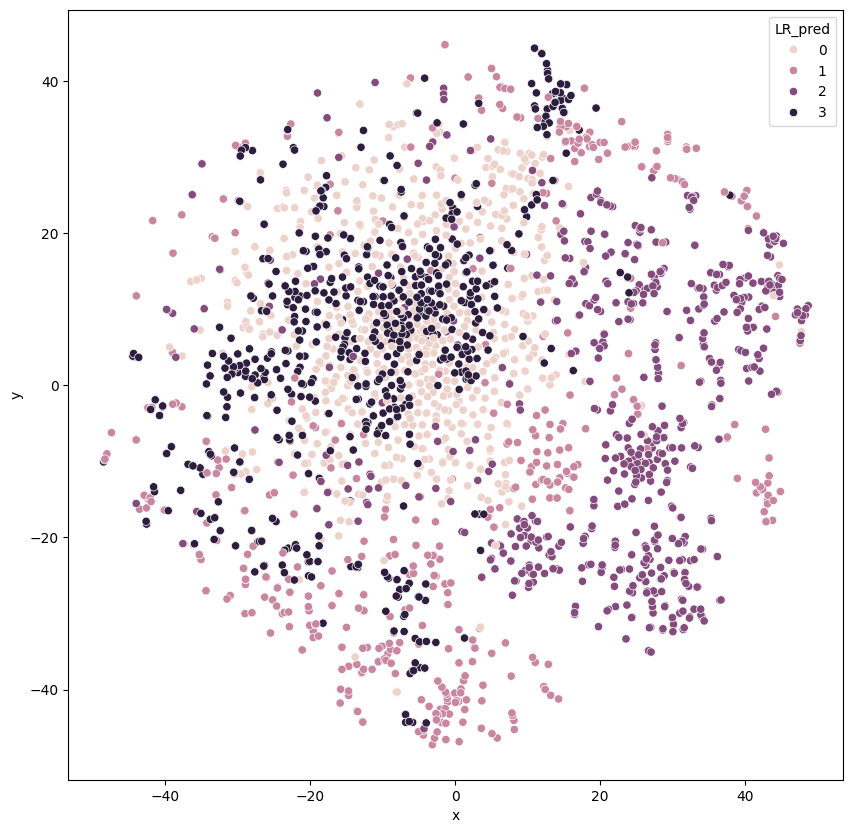

In [86]:
# plot the results using tsne

df_tsne["LR_pred"] = lr.predict(X)

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_tsne, x="x", y="y", hue="LR_pred")

plt.show()

# RF - Random Forest Classifier

In [87]:
# use Random Forest with 10-fold cross validation

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

scores = cross_val_score(rf, X_train, y_train, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.84 (+/- 0.04)


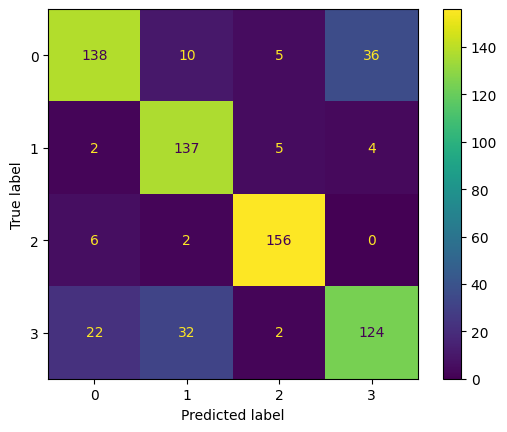

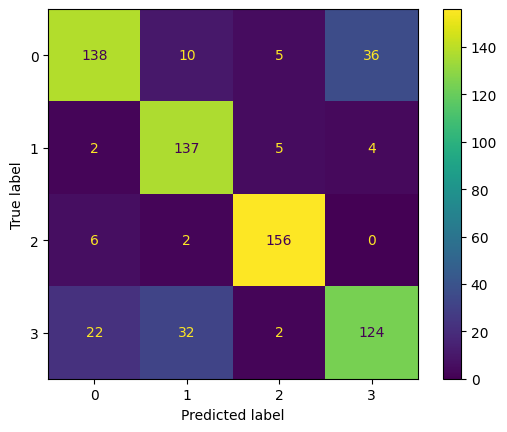

In [88]:
# same

# visualize the results of the classification for all the X

rf.fit(X_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

disp.plot()

plt.show()

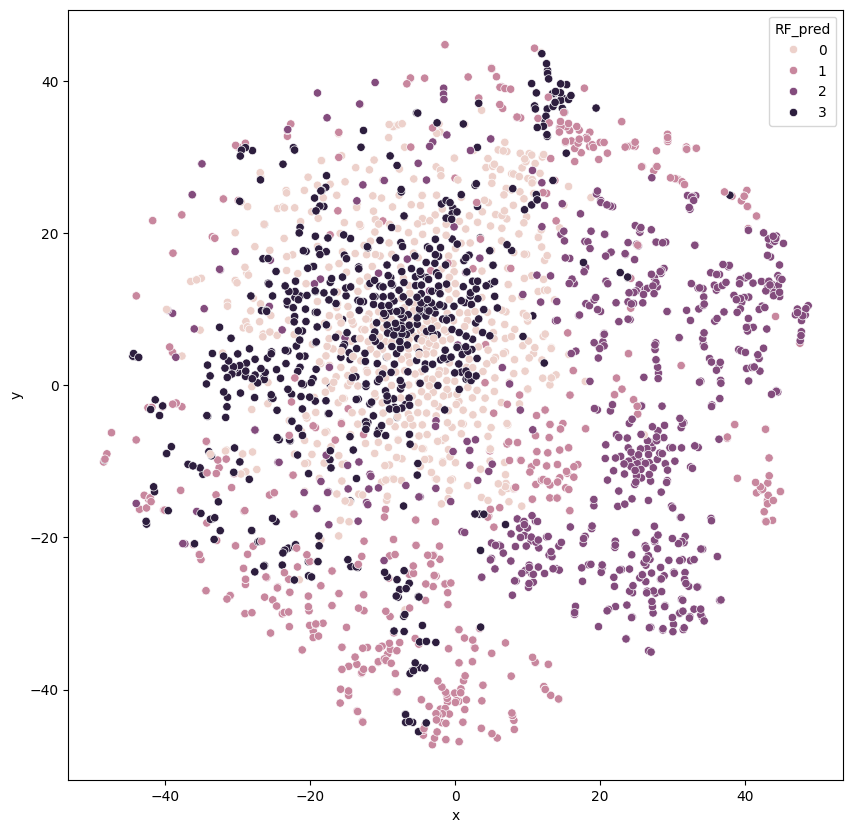

In [89]:
# plot the results using tsne

df_tsne["RF_pred"] = rf.predict(X)

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_tsne, x="x", y="y", hue="RF_pred")

plt.show()

# ANN - Artificial Neural Network Classifier

We will build a NN using `tensorflow` and `keras` to classify the journal group.

The architecture of the NN is as follows:

- Embedding layer with 100 input dimensions.
- Hidden layer with 10 node and `relu` activation function.
- Hidden layer with 10 node and `relu` activation function.
- Hidden layer with 7 node and `relu` activation function.
- Output layer with 4 nodes and `softmax` activation function. (4 classes)

Seconde architecture:

- Embedding layer with 100 input dimensions.
- Hidden layer with 10 node and `gelu` activation function.
- Hidden layer with 10 node and `gelu` activation function.
- Hidden layer with 7 node and `gelu` activation function.
- Output layer with 4 nodes and `softmax` activation function. (4 classes)

In [90]:
X = X.astype(np.float32)
y = y.astype(int)

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

model_1 = Sequential([
    Dense(100, activation='relu', input_shape=(X.shape[1],)),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(7, activation='relu'),
    Dense(4, activation='softmax')
])

# compile the model
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# fit the model
history = model_1.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.3530 - loss: 1.2607 - val_accuracy: 0.5798 - val_loss: 0.8239
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6984 - loss: 0.7063 - val_accuracy: 0.8484 - val_loss: 0.4531
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8873 - loss: 0.4004 - val_accuracy: 0.8564 - val_loss: 0.4015
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9307 - loss: 0.2542 - val_accuracy: 0.8670 - val_loss: 0.3343
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9468 - loss: 0.2004 - val_accuracy: 0.8537 - val_loss: 0.3318
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9660 - loss: 0.1545 - val_accuracy: 0.8963 - val_loss: 0.2902
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9752 - loss: 0.1049 - val_accuracy: 0.8883 - val_loss: 0.2940
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9820 - loss: 0.0940 - val_accuracy: 0.8883 - val_loss

In [93]:
# model 2

model_2 = Sequential(
    [
        Dense(100, activation="gelu", input_shape=(X.shape[1],)),
        Dense(10, activation="gelu"),
        Dense(10, activation="gelu"),
        Dense(7, activation="gelu"),
        Dense(4, activation="softmax"),
    ]
)

# compile the model
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# fit the model
history = model_2.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.4231 - loss: 1.2205 - val_accuracy: 0.7154 - val_loss: 0.7140
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6909 - loss: 0.6797 - val_accuracy: 0.8085 - val_loss: 0.5021
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8397 - loss: 0.4421 - val_accuracy: 0.8112 - val_loss: 0.4669
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8843 - loss: 0.3324 - val_accuracy: 0.8537 - val_loss: 0.4077
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9090 - loss: 0.2515 - val_accuracy: 0.8590 - val_loss: 0.3766
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9432 - loss: 0.1861 - val_accuracy: 0.8777 - val_loss: 0.3692
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9625 - loss: 0.1302 - val_accuracy: 0.8777 - val_loss: 0.3958
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1245 - val_accuracy: 0.8670 - val_loss

In [94]:
# check the accuracy of the models

# model 1
loss, accuracy = model_1.evaluate(X_test, y_test)

print("Model 1 Accuracy: ", accuracy)

# model 2

loss, accuracy = model_2.evaluate(X_test, y_test)

print("Model 2 Accuracy: ", accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8843 - loss: 0.3632
Model 1 Accuracy:  0.8808510899543762
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8401 - loss: 0.5523
Model 2 Accuracy:  0.8510638475418091


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


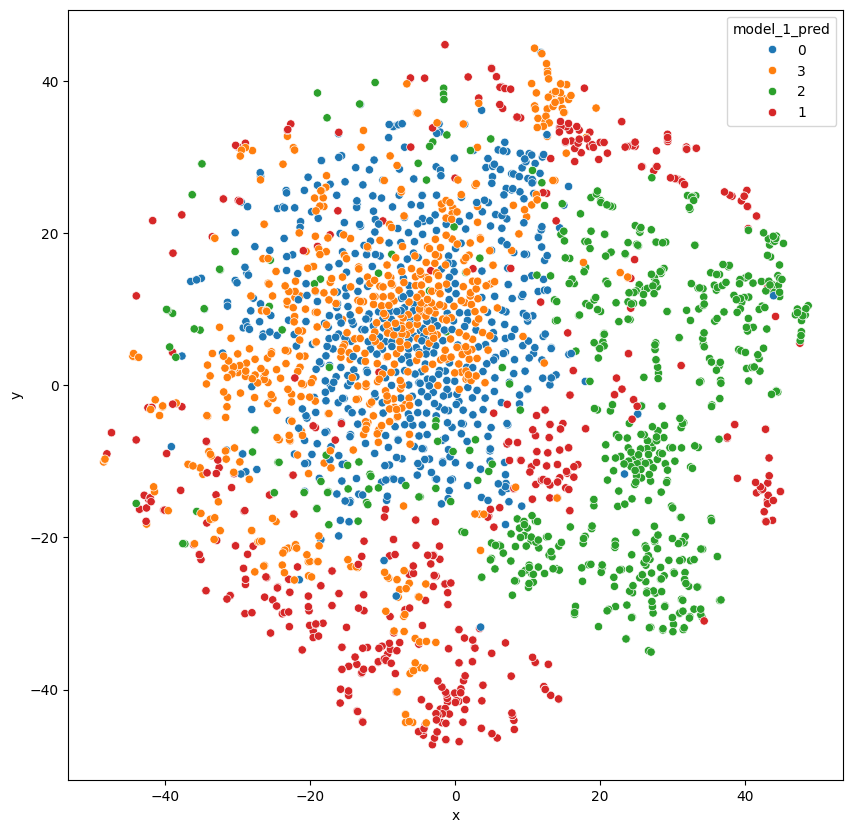

In [95]:
# plot the prediction for model 1

predictions = model_1.predict(X)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


df_tsne["model_1_pred"] = [str(cls) for cls in predicted_classes]

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_tsne, x="x", y="y", hue="model_1_pred")

plt.show()

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


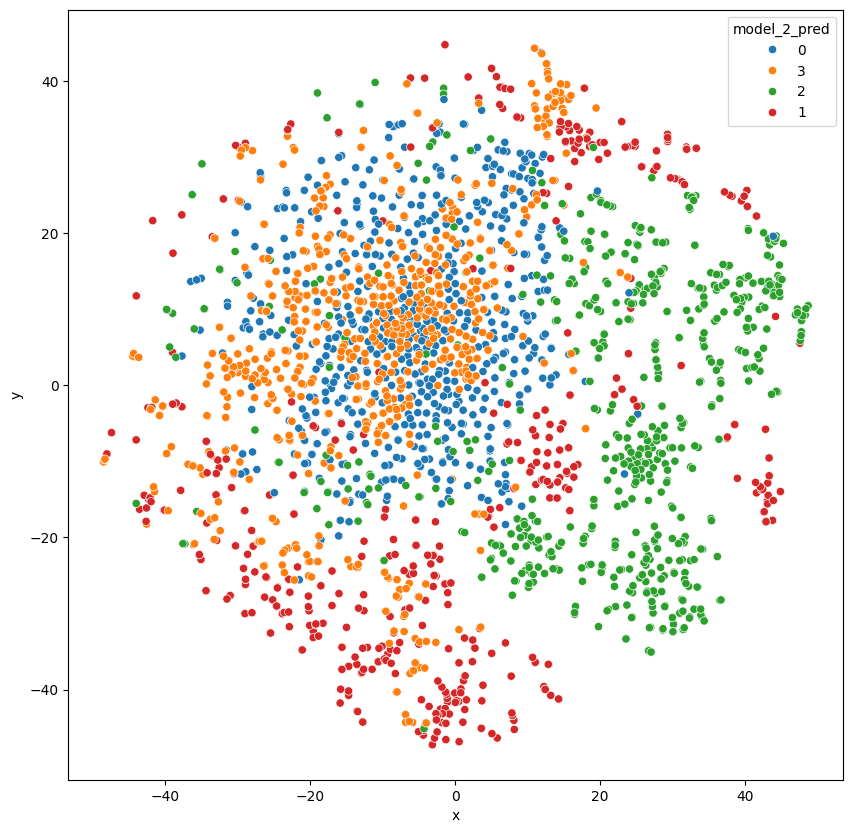

In [96]:
# plot the prediction for model 1

predictions = model_2.predict(X)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


df_tsne["model_2_pred"] = [str(cls) for cls in predicted_classes]

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_tsne, x="x", y="y", hue="model_2_pred")

plt.show()

In [97]:
# save the model into a file

model_1.save("model_1_doc2vec.h5")

model_2.save("model_2_doc2vec.h5")